## Global

In [676]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [677]:
#download image
# !wget -O rice.png "https://raw.githubusercontent.com/ozgunsungar/count-rice/main/rice%20(1).png"
!wget -O rice.png https://raw.githubusercontent.com/ozgunsungar/count-rice/main/rice.png


--2022-05-10 16:16:40--  https://raw.githubusercontent.com/ozgunsungar/count-rice/main/rice.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193391 (189K) [image/png]
Saving to: ‘rice.png’

rice.png            100%[===================>] 188.86K  --.-KB/s    in 0.02s   

2022-05-10 16:16:40 (11.8 MB/s) - ‘rice.png’ saved [193391/193391]



## First Approach (BEST)

In [678]:
image = cv2.imread('rice.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [679]:
blur = cv2.GaussianBlur(gray, (7,7), 0)

In [680]:
ret, thresh = cv2.threshold(gray,120,255, cv2.THRESH_BINARY)

In [681]:
canny = cv2.Canny(blur,50, 100)

In [682]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)

In [683]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

array([[[122, 122, 122],
        [108, 108, 108],
        [ 93,  93,  93],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 92,  92,  92]],

       [[111, 111, 111],
        [103, 103, 103],
        [ 95,  95,  95],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 91,  91,  91]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 93,  93,  93]],

       ...,

       [[ 52,  52,  52],
        [ 52,  52,  52],
        [ 52,  52,  52],
        ...,
        [ 52,  52,  52],
        [ 51,  51,  51],
        [ 54,  54,  54]],

       [[ 56,  56,  56],
        [ 53,  53,  53],
        [ 51,  51,  51],
        ...,
        [ 49,  49,  49],
        [ 47,  47,  47],
        [ 48,  48,  48]],

       [[ 59,  59,  59],
        [ 55,  55,  55],
        [ 51,  51,  51],
        ...,
        [ 46,  46,  46],
        [ 42,  42,  42],
        [ 42,  42,  42]]

In [684]:
imgContour = image.copy()

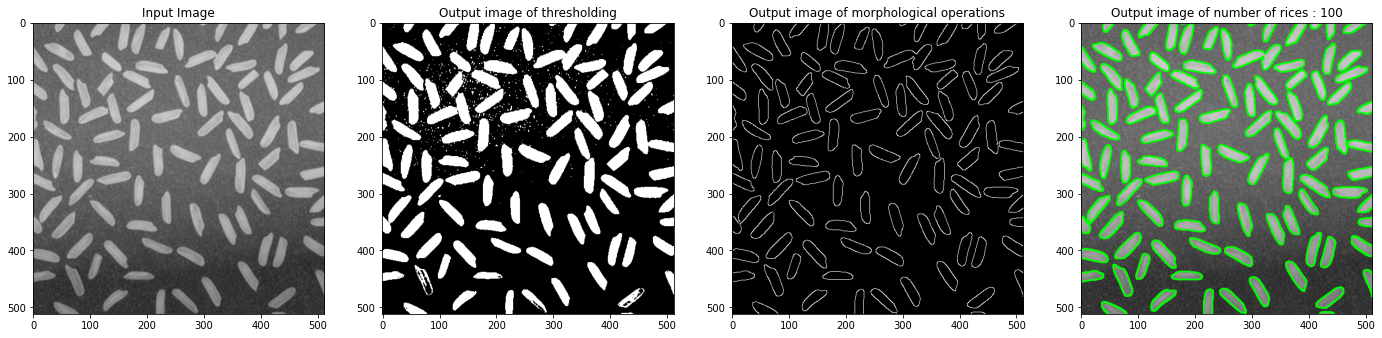

In [685]:
fig= plt.figure()
fig.set_figheight(15)
fig.set_figwidth(24)

fig.add_subplot(1,4,1)
plt.title("Input Image")
plt.imshow(image, cmap='gray')

fig.add_subplot(1,4,2)
plt.title("Output image of thresholding")
plt.imshow(thresh, cmap='gray')

fig.add_subplot(1,4,3)
plt.title("Output image of morphological operations")
plt.imshow(dilated, cmap='gray')

fig.add_subplot(1,4,4)
plt.title("Output image of number of rices : {0}".format(len(cnt)))
plt.imshow(rgb, cmap='gray')


## Second Approach

In [686]:
#Open the picture 
img=cv2.imread( 'rice.png',0 )
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [687]:
kernel=np.ones(( 5 , 5 ),np.uint8)
erosion=cv2.erode(img,kernel,iterations= 6 )
dilation=cv2.dilate(erosion,kernel,iterations= 4 )

In [688]:
#Original image minus the background to get the shape of rice grains
backImg=dilation
rice=img-backImg 

In [689]:
#Thresholding
ret, th1 = cv2.threshold(rice,20,255, cv2.THRESH_BINARY)

In [690]:
#Morphological operations
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel)

kernel=np.ones(( 3 , 3 ),np.uint8)
erosion=cv2.erode(opening,kernel,iterations= 1 )
rice = opening - erosion

In [691]:
#Contour detection
(cnt, hierarchy) = cv2.findContours(
    rice.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

array([[[122, 122, 122],
        [108, 108, 108],
        [ 93,  93,  93],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 92,  92,  92]],

       [[111, 111, 111],
        [103, 103, 103],
        [ 95,  95,  95],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 91,  91,  91]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 93,  93,  93]],

       ...,

       [[ 52,  52,  52],
        [ 52,  52,  52],
        [ 52,  52,  52],
        ...,
        [ 52,  52,  52],
        [ 51,  51,  51],
        [ 54,  54,  54]],

       [[ 56,  56,  56],
        [ 53,  53,  53],
        [ 51,  51,  51],
        ...,
        [ 49,  49,  49],
        [ 47,  47,  47],
        [ 48,  48,  48]],

       [[ 59,  59,  59],
        [ 55,  55,  55],
        [ 51,  51,  51],
        ...,
        [ 46,  46,  46],
        [ 42,  42,  42],
        [ 42,  42,  42]]

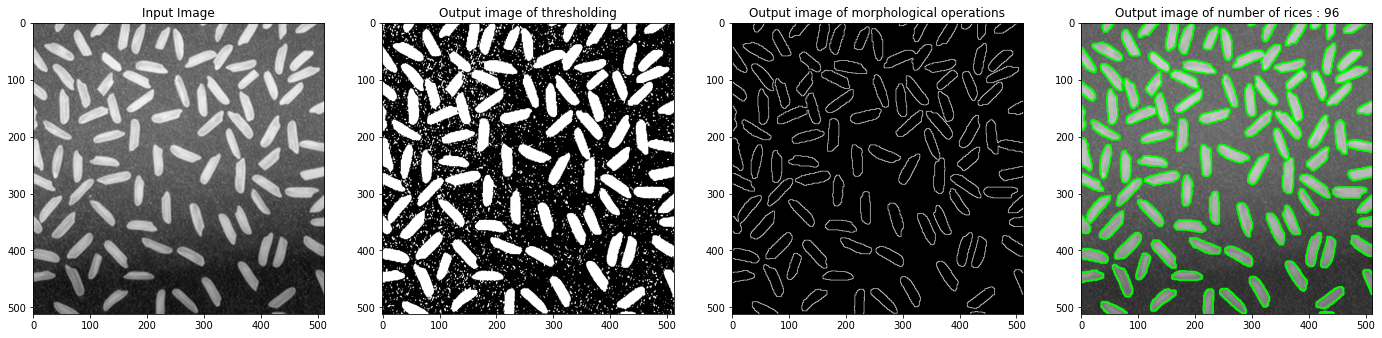

In [692]:
#Display
fig= plt.figure()
fig.set_figheight(15)
fig.set_figwidth(24)

fig.add_subplot(1,4,1)
plt.title("Input Image")
plt.imshow(img, cmap='gray')

fig.add_subplot(1,4,2)
plt.title("Output image of thresholding")
plt.imshow(th1, cmap='gray')

fig.add_subplot(1,4,3)
plt.title("Output image of morphological operations")
plt.imshow(rice, cmap='gray')

fig.add_subplot(1,4,4)
plt.title("Output image of number of rices : {0}".format(len(cnt)))
plt.imshow(rgb, cmap='gray')